In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_raw = pd.read_csv(r"C:\Users\Bhawna\Downloads\RetailStoreProductSalesDataset.csv")
df_raw.head()

,Unnamed: 0,price,discount,promotion_intensity,footfall,ad_spend,competitor_price,stock_level,weather_index,customer_sentiment,return_rate
0,0,45.197454,5.514259,4.062653,277.017484,2559.073870,44.255411,1176.981397,7.442194,1.021762,0.067388
1,1,49.327512,6.572035,4.964657,250.760714,2536.417155,50.331704,1219.359497,6.759510,0.975142,0.082719
2,2,47.328457,6.972713,4.363191,263.130478,2552.952356,49.285996,1263.822738,5.941689,0.871567,0.061600
3,3,50.964538,4.808234,3.577988,297.603918,2605.398826,46.839936,1182.435378,8.517014,1.071300,0.052215
4,4,44.530213,8.180216,4.966638,208.931691,2432.485683,45.336500,1178.513263,8.422473,1.068515,0.057975


In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           15000 non-null  int64  
 1   price                15000 non-null  float64
 2   discount             15000 non-null  float64
 3   promotion_intensity  15000 non-null  float64
 4   footfall             15000 non-null  float64
 5   ad_spend             15000 non-null  float64
 6   competitor_price     15000 non-null  float64
 7   stock_level          15000 non-null  float64
 8   weather_index        15000 non-null  float64
 9   customer_sentiment   15000 non-null  float64
 10  return_rate          15000 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 1.3 MB


In [3]:
df_raw.drop('Unnamed: 0', axis=1, inplace=True)

<Axes: >

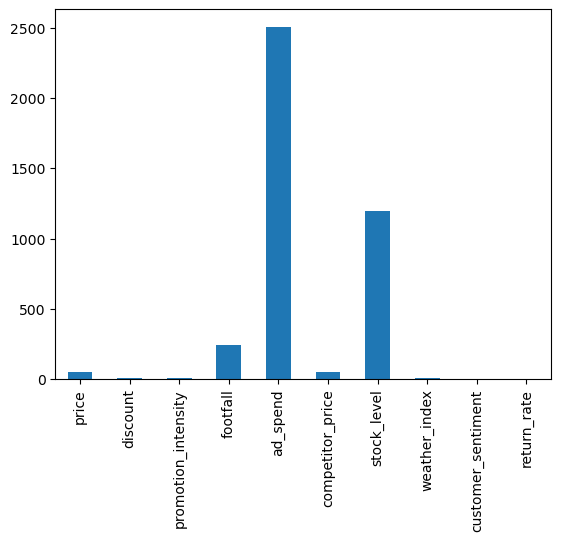

In [5]:
df_raw.describe().T['mean'].plot.bar()

# Boxplot for outliers

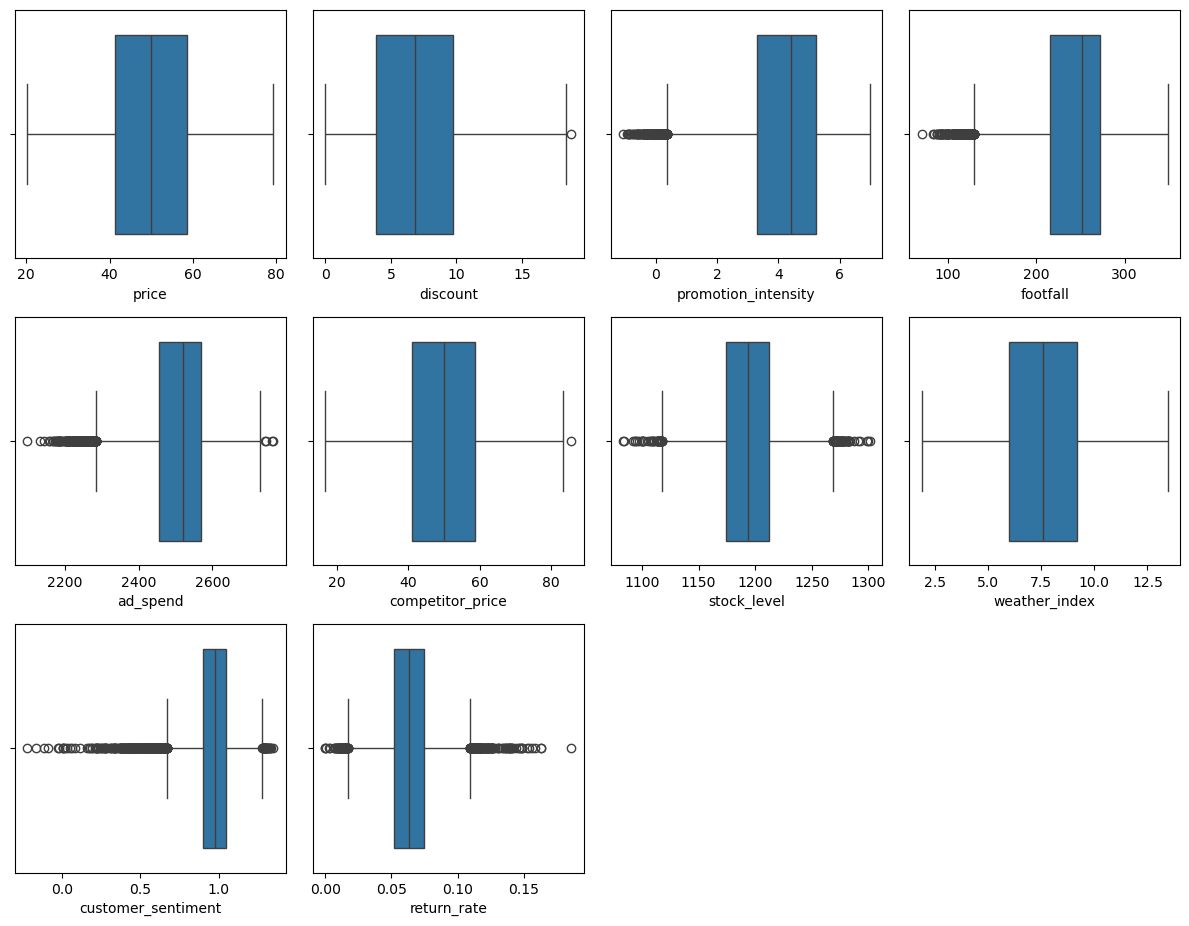

In [6]:
plt.figure(figsize=(12,12))
for i,j in enumerate(df_raw.columns):
    plt.subplot(4,4,i+1)
    sns.boxplot(x=df_raw[j])
plt.tight_layout()
plt.show()

# Treating Outliers

In [4]:
def treat_outliers(df, method='IQR'):
    for i in (df.columns):
        Q1 = df[i].quantile(0.25)
        Q3 = df[i].quantile(0.75)
        IQR = Q3-Q1
        lower_bound = Q1 - 1.5*IQR
        upper_bound = Q3 + 1.5*IQR
        df[i] = np.clip(df[i], lower_bound, upper_bound)

In [5]:
treat_outliers(df_raw)

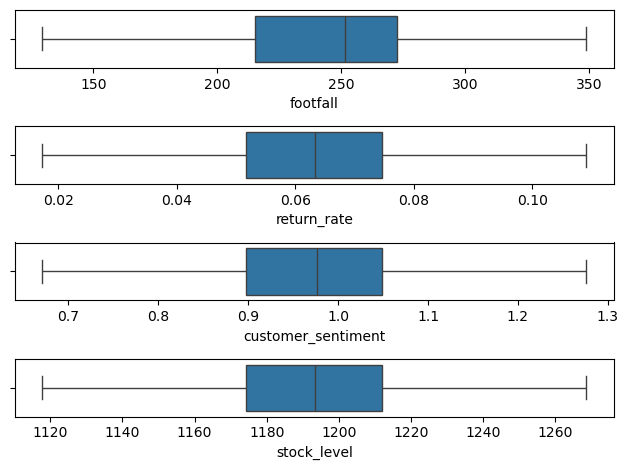

In [9]:
f, axes = plt.subplots(4)
sns.boxplot(x=df_raw['footfall'], ax=axes[0])
sns.boxplot(x=df_raw['return_rate'], ax=axes[1])
sns.boxplot(x=df_raw['customer_sentiment'], ax=axes[2])
sns.boxplot(x=df_raw['stock_level'], ax=axes[3])
plt.tight_layout()
plt.show()

In [10]:
df_raw.head()

,price,discount,promotion_intensity,footfall,ad_spend,competitor_price,stock_level,weather_index,customer_sentiment,return_rate
0,45.197454,5.514259,4.062653,277.017484,2559.073870,44.255411,1176.981397,7.442194,1.021762,0.067388
1,49.327512,6.572035,4.964657,250.760714,2536.417155,50.331704,1219.359497,6.759510,0.975142,0.082719
2,47.328457,6.972713,4.363191,263.130478,2552.952356,49.285996,1263.822738,5.941689,0.871567,0.061600
3,50.964538,4.808234,3.577988,297.603918,2605.398826,46.839936,1182.435378,8.517014,1.071300,0.052215
4,44.530213,8.180216,4.966638,208.931691,2432.485683,45.336500,1178.513263,8.422473,1.068515,0.057975


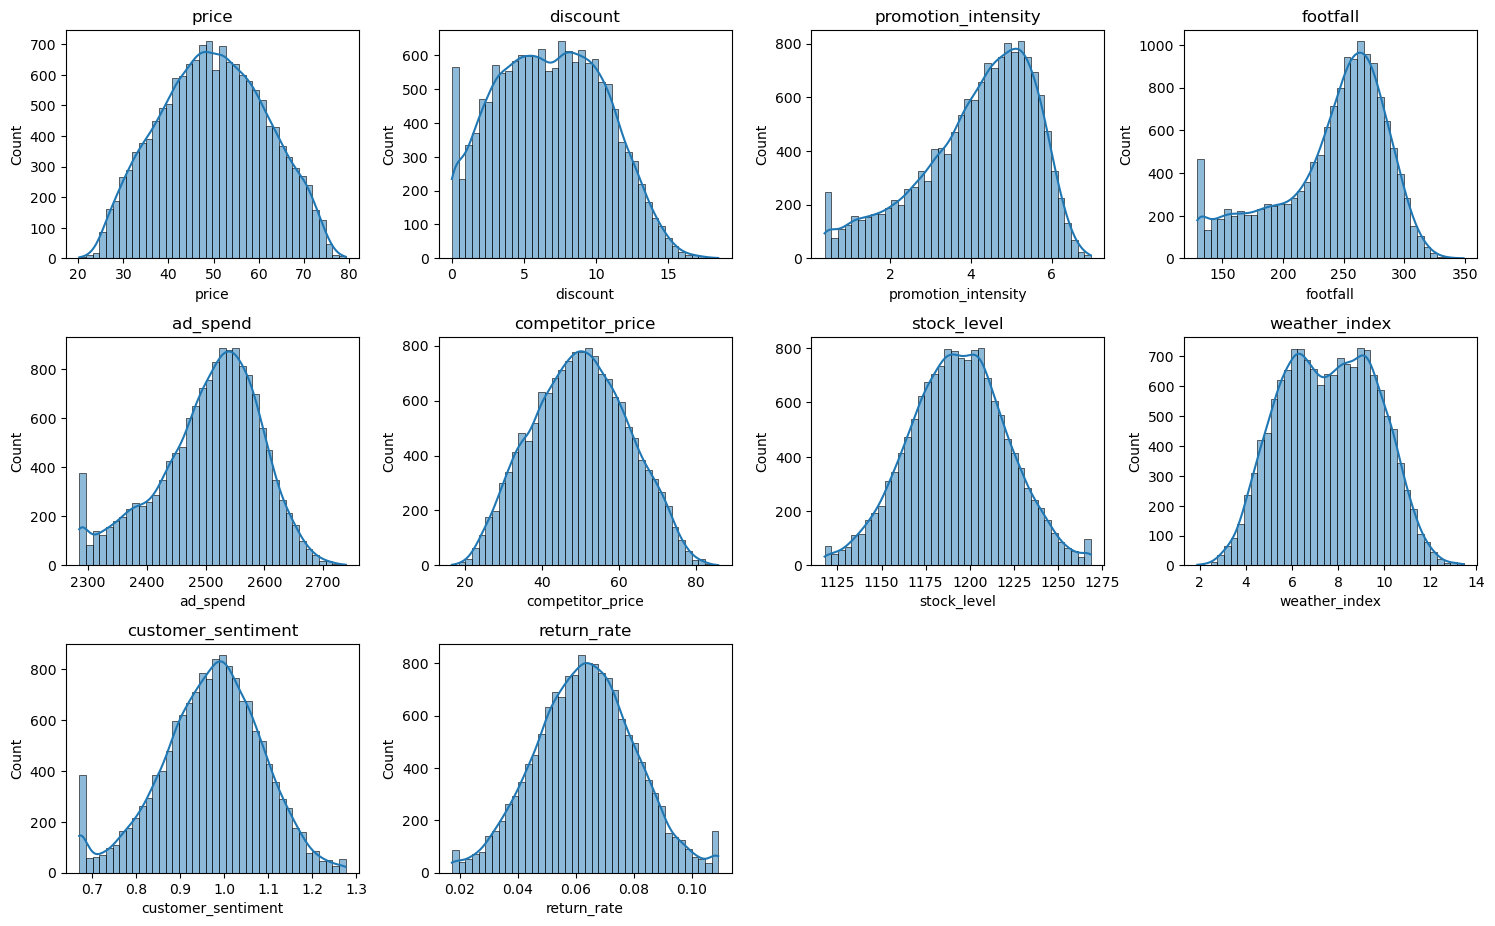

In [116]:
plt.figure(figsize=(15,12))
for i,j in enumerate(df_raw.columns):
    plt.subplot(4,4,i+1)
    sns.histplot(df_raw[j], bins=40, kde=True)
    plt.title(j)
plt.tight_layout()
plt.show()

In [12]:
df_copy = df_raw.copy()

In [13]:
len(df_copy[df_copy.duplicated() == False])

15000

In [14]:
x = df_copy['footfall'].sort_values(ascending=False).head(5)

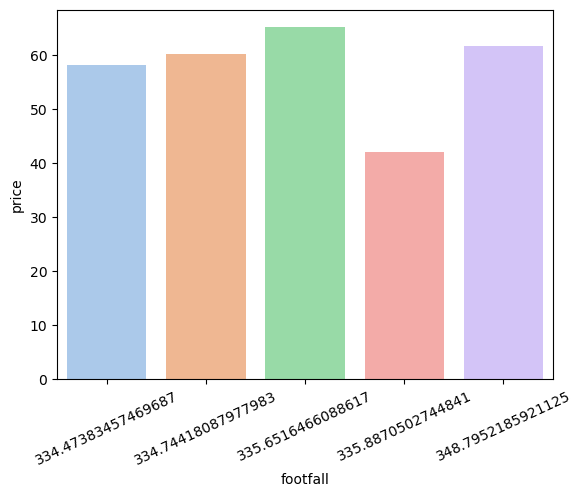

In [15]:
sns.barplot(x=x, y=df_copy['price'], palette='pastel')
plt.xticks(rotation=25)
plt.show()

In [16]:
from scipy import stats

# Hypothesis Testing

In [17]:
df_sample = df_copy.sample(1000, random_state=42)

In [18]:
df_sample.shape

(1000, 10)

In [19]:
# Null hypothesis: Mean footfall (high discount) = Mean footfall (low discount)
# Alternate hypothesis: Means are different
low_discount = df_sample[df_sample['discount'] < 5]['footfall']
high_discount = df_sample[df_sample['discount'] > 7]['footfall']
t_stat, p_value = stats.ttest_ind(low_discount, high_discount, equal_var=False)
print(p_value)
print(t_stat)

2.298848655052408e-32
-12.446765995236534


In [20]:
# We reject the null hypothesis

In [21]:
# Null hypothesis: Correlation between ad-spend and footfall = 0
# Alternate hypothesis: Correlation between ad-spend and footfall != 0
x = df_sample['ad_spend']
y = df_sample['footfall']
corr_coef , p_val = stats.pearsonr(x, y)
print(p_val)

3.6334566138229116e-228


# Data preprocessing for Model Training

In [6]:
x = df_raw.drop('footfall', axis=1)
y = df_raw[['footfall']]

## Import libraries

In [7]:
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold, GridSearchCV, RandomizedSearchCV
kfold = StratifiedKFold(n_splits=4)

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.metrics import r2_score, accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix


In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

# Linear Regression

In [9]:
lr = LinearRegression(n_jobs=-1)

In [26]:
lr.fit(x_train, y_train)

LinearRegression(n_jobs=-1)

In [27]:
y_pred = lr.predict(x_test)
print(r2_score(y_pred, y_test))

0.6609489765839525


# Decision Tree Regressor

In [10]:
dt = DecisionTreeRegressor(max_depth=6)

In [35]:
cross_validate(dt, x, y, n_jobs=-1, return_train_score=True)

{'fit_time': array([0.24234509, 0.26911688, 0.25872588, 0.27414227, 0.27436304]),
 'score_time': array([0.00687003, 0.00882959, 0.00657678, 0.00896549, 0.01252532]),
 'test_score': array([0.67294983, 0.7449526 , 0.72859137, 0.71833475, 0.71990026]),
 'train_score': array([0.76172644, 0.75060126, 0.75620437, 0.76282408, 0.75927694])}

# Random Forest Regressor

In [11]:
rf = RandomForestRegressor( max_depth=6, n_jobs=-1, n_estimators=50)

In [40]:
cross_validate(rf, x, y, cv=5,
    return_train_score=True )

{'fit_time': array([1.39686656, 1.80688357, 1.98592234, 1.91988158, 1.81444645]),
 'score_time': array([0.05358076, 0.06048393, 0.05320954, 0.05359101, 0.05415273]),
 'test_score': array([0.7108837 , 0.77518742, 0.76691967, 0.74504893, 0.74955906]),
 'train_score': array([0.78479989, 0.77607772, 0.78281367, 0.78614598, 0.78350108])}

# Unsupervised Machine learning Models

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()

In [14]:
df_scaled = scaler.fit_transform(df_raw)
df_scaled

array([[-0.40727157, -0.35432665, -0.05513365, ..., -0.07691742,
         0.44803497,  0.23618015],
       [-0.05384501, -0.07101665,  0.57908516, ..., -0.41282766,
         0.04822912,  1.12625525],
       [-0.22491261,  0.03629895,  0.15618102, ..., -0.81523097,
        -0.84000218, -0.09985454],
       ...,
       [-1.3940136 ,  0.50825337,  0.26253831, ..., -0.1580167 ,
        -0.08074842,  1.75372128],
       [-0.9345432 ,  0.75145337,  0.7832217 , ...,  0.13364011,
         0.06056155,  0.00846467],
       [-0.15508356, -0.32496443,  0.19221962, ..., -0.53976383,
        -0.56896694, -0.21662643]])

In [15]:
df_scaled = pd.DataFrame(df_scaled, columns= df_raw.columns)
df_scaled.head()

,price,discount,promotion_intensity,footfall,ad_spend,competitor_price,stock_level,weather_index,customer_sentiment,return_rate
0,-0.407272,-0.354327,-0.055134,0.818197,0.607181,-0.465818,-0.583490,-0.076917,0.448035,0.236180
1,-0.053845,-0.071017,0.579085,0.242023,0.349319,0.026855,0.931564,-0.412828,0.048229,1.126255
2,-0.224913,0.036299,0.156181,0.513463,0.537510,-0.057932,2.521164,-0.815231,-0.840002,-0.099855
3,0.086242,-0.543425,-0.395912,1.269942,1.134418,-0.256261,-0.388506,0.451941,0.872862,-0.644727
4,-0.464370,0.359711,0.580478,-0.675865,-0.833555,-0.378162,-0.528725,0.405423,0.848977,-0.310338


In [16]:
from sklearn.cluster import KMeans

In [18]:
km = KMeans(n_clusters=4)
km.fit(df_scaled)

KMeans(n_clusters=4)

In [19]:
df_scaled['cluster'] = km.predict(df_scaled)

In [20]:
df_scaled['cluster'].value_counts()

cluster
1    4251
3    4241
2    3931
0    2577
Name: count, dtype: int64

<Axes: xlabel='cluster', ylabel='count'>

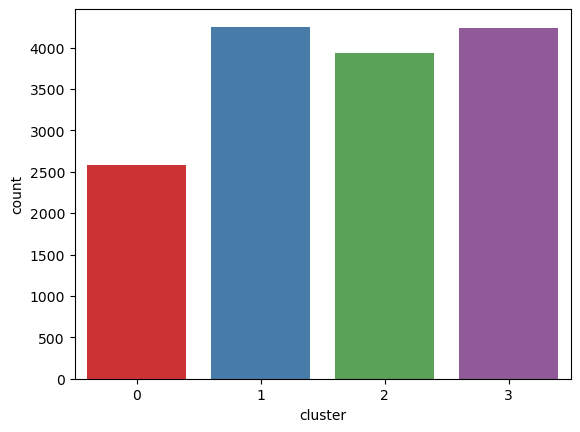

In [21]:
sns.countplot(x=df_scaled['cluster'], palette='Set1')

# Principle Component Analysis

In [22]:
from sklearn.decomposition import PCA

In [23]:
pca = PCA(2)

In [24]:
df = pca.fit_transform(df_scaled)

In [25]:
df_final = pd.DataFrame(df, columns=['plane-1','plane-2'])

In [26]:
df_final['label'] = df_scaled['cluster'].tolist()

In [27]:
df_final.head()

,plane-1,plane-2,label
0,0.688518,0.272795,2
1,0.622023,0.700517,2
2,0.742399,0.955104,2
3,0.990050,-0.921665,3
4,0.489761,-1.039761,3


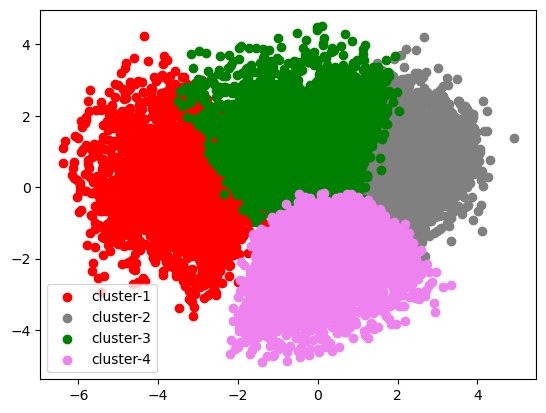

In [28]:
filter_label0 = df_final[df_final['label']==0]
filter_label1 = df_final[df_final['label']==1]
filter_label2 = df_final[df_final['label']==2]
filter_label3 = df_final[df_final['label']==3]

plt.scatter(filter_label0['plane-1'], filter_label0['plane-2'], color='red')
plt.scatter(filter_label1['plane-1'], filter_label1['plane-2'], color='grey')
plt.scatter(filter_label2['plane-1'], filter_label2['plane-2'], color='green')
plt.scatter(filter_label3['plane-1'], filter_label3['plane-2'], color='violet')
plt.legend(['cluster-1','cluster-2','cluster-3','cluster-4'])
plt.show()

In [29]:
cwss = []
for i in range(2,11):
    km = KMeans(n_clusters=i)
    km.fit(df_scaled)
    cwss.append(km.inertia_)

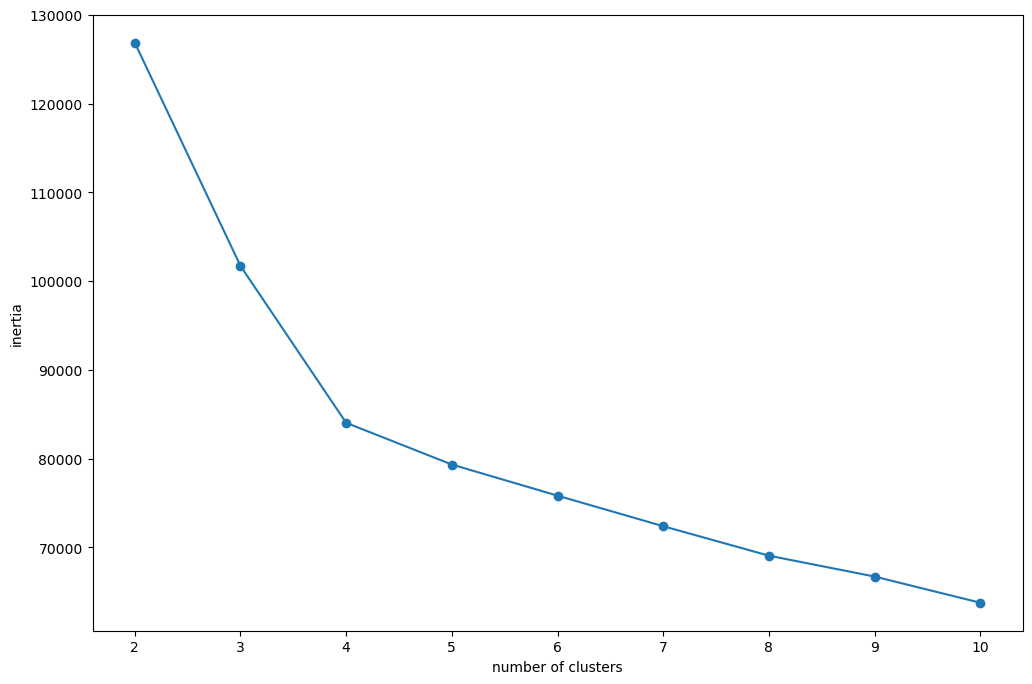

In [30]:
x = range(2,11)
plt.figure(figsize=(12,8))
plt.plot(x, cwss, '-o')
plt.xlabel('number of clusters')
plt.ylabel('inertia')
plt.xticks(x)
plt.show()

# DBSCAN

In [31]:
from sklearn.cluster import DBSCAN

In [91]:
dbscan = DBSCAN(  eps=1.8, n_jobs=-1, min_samples=3)

In [100]:
dbscan.fit(df_scaled)

DBSCAN(eps=1.8, min_samples=3, n_jobs=-1)

In [101]:
clusters = dbscan.labels_

In [102]:
len(set(clusters))

2

In [103]:
from sklearn.metrics import silhouette_score

In [104]:
silhouette_score(df_scaled, clusters)

np.float64(0.202921632184688)

# Hierarchical Clustering

In [105]:
import scipy.cluster.hierarchy as sch

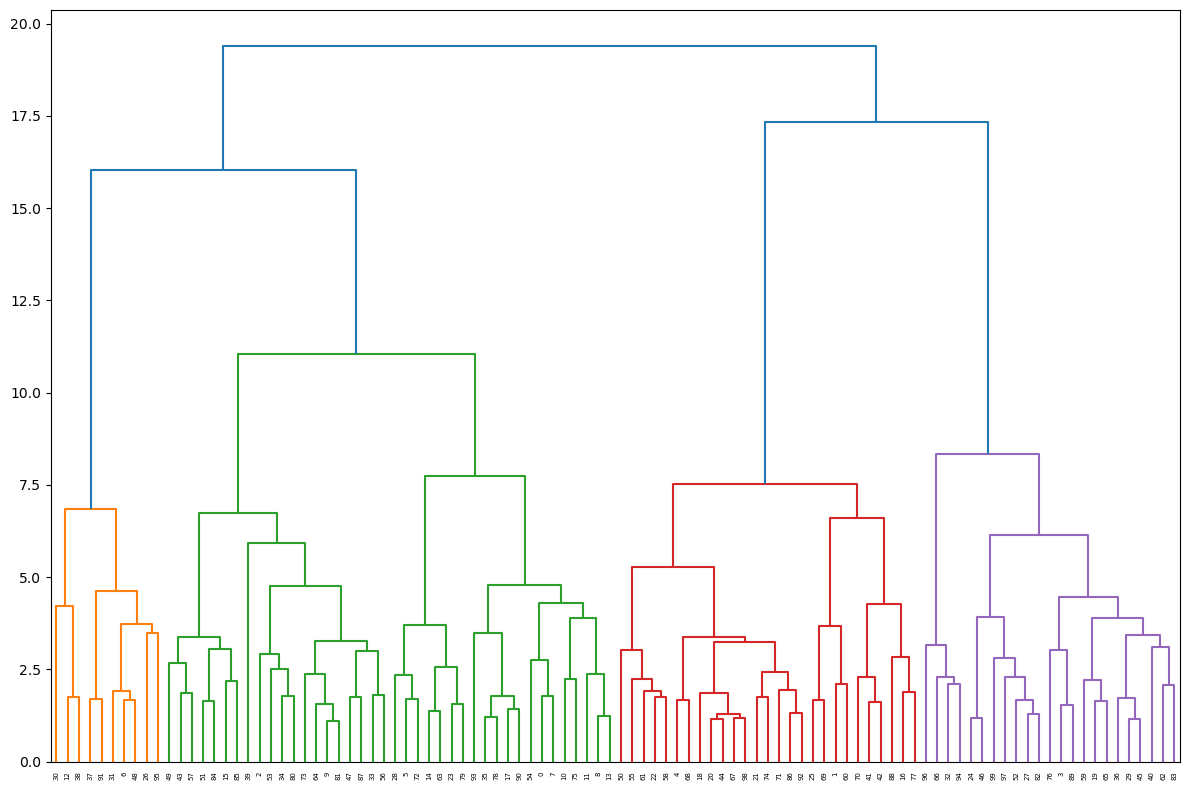

In [110]:
plt.figure(figsize=(12,8))
dendrogram = sch.dendrogram(sch.linkage(df_scaled.sample(100), method='ward'))
plt.tight_layout()
plt.show()